In [ ]:
#RUN THIS LINE OF CODE IF pd.read_sql_query DOES NOT WORK
#!pip install pandas==0.24.2

In [1]:
import pandas as pd
print(pd.__version__)

0.24.2


In [12]:
from sqlalchemy import create_engine
import getpass 
import psycopg2
import helper_functions as hp
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
db_string = "postgres://MONEYDB:{}@moneydb.cpbpjwbxydzi.us-east-2.rds.amazonaws.com:5432/postgres".format(getpass.getpass())

db = create_engine(db_string)

In [3]:
query = """

select * from public."Upward_Trends_Curr"
where "Day"= '1 Days Ago'
order by "MACD" desc

"""

In [32]:


fr = pd.read_sql_query(query,con=db)
fr

,index,Date,ticker,MACD,signal,Close,Upward,Day,DailyVariance,Daily_Volatility,Annualized_Volatility
0,16,2020-07-08,PFPT,0.345245,-0.707829,118.010002,1,1 Days Ago,0.000767,0.027700,0.437978
1,9,2020-07-08,HTHT,0.165947,0.145048,37.900002,1,1 Days Ago,0.001223,0.034966,0.552862
2,12,2020-07-08,MORN,0.124369,-0.287607,150.470001,1,1 Days Ago,0.000328,0.018122,0.286536
3,14,2020-07-08,OSUR,0.098272,-0.351965,13.370000,1,1 Days Ago,0.001916,0.043775,0.692145
4,15,2020-07-08,PCOM,0.058264,0.066283,10.370000,1,1 Days Ago,0.002968,0.054476,0.861336
5,10,2020-07-08,KINS,0.053550,-0.001089,5.290000,1,1 Days Ago,0.002657,0.051544,0.814980
6,13,2020-07-08,OLED,0.040854,-0.371574,158.410004,1,1 Days Ago,0.000716,0.026760,0.423110
7,11,2020-07-08,LWAY,0.024709,-0.007089,2.758600,1,1 Days Ago,0.001508,0.038831,0.613971
8,21,2020-07-08,WPRT,0.014267,-0.006270,1.490000,1,1 Days Ago,0.004928,0.070197,1.109906
9,20,2020-07-08,TRUE,0.013786,-0.009572,3.080000,1,1 Days Ago,0.003363,0.057990,0.916907


##### 26 Days vs 12 Day MA (When 12 day moves above the 26 day, this indicates an upward trend signal)

In [39]:
ticker = 'PFPT'

In [40]:



SDOW_q = """

select * from public."All_Prices_Full"
where ticker = '{}'

""".format(ticker)

In [41]:

SDOW = pd.read_sql_query(SDOW_q,con=db)



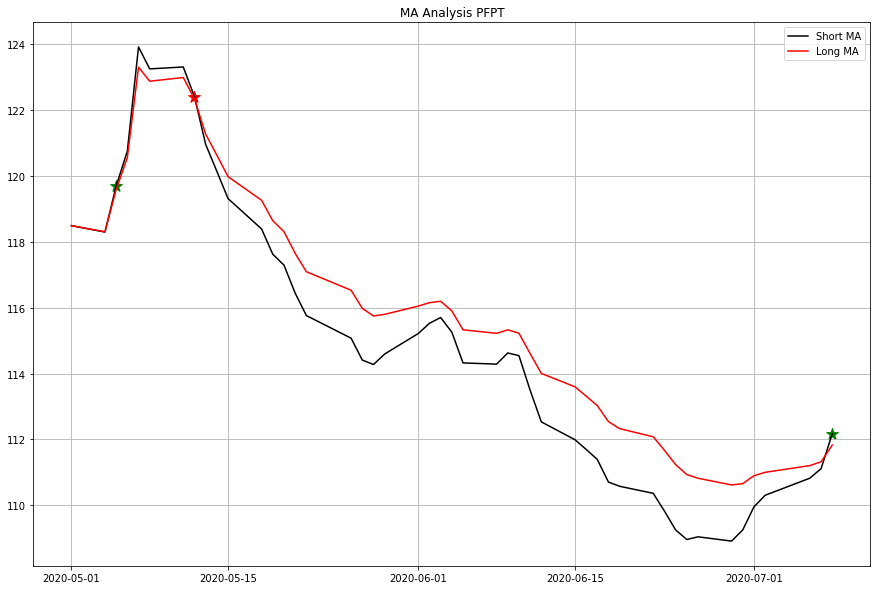

In [42]:




plt.figure(figsize=(15,10))
plt.plot(SDOW['Date'],SDOW['12Day_Moving_Average_Close'],label='Short MA',color='k')
plt.plot(SDOW['Date'],SDOW['26Day_Moving_Average_Close'],label='Long MA',color='r')


for values in range(len(SDOW)):
    if values!=0:
        if SDOW['MACD'].iloc[values]<0:
            if SDOW['MACD'].iloc[values-1]>0:
                plt.scatter(SDOW['Date'].iloc[values-1],SDOW['12Day_Moving_Average_Close'].iloc[values-1],marker='*',
                       color='red',s=150)
                
    if SDOW['MACD'].iloc[values]>=0:
        if SDOW['MACD'].iloc[values-1]<0:
            plt.scatter(SDOW['Date'].iloc[values],SDOW['12Day_Moving_Average_Close'].iloc[values],marker='*',
                       color='green',s=150)
            
            
plt.title('MA Analysis {}'.format(ticker))
plt.grid()
plt.legend()
plt.show()

##### When the blue line ocilates above the zero line, this indicates that the short term MA is above the long term MA....BUY signal.
##### When the blue line ocilates below the zero line, this indicates that the short term MA is below the long term MA....SELL signal.

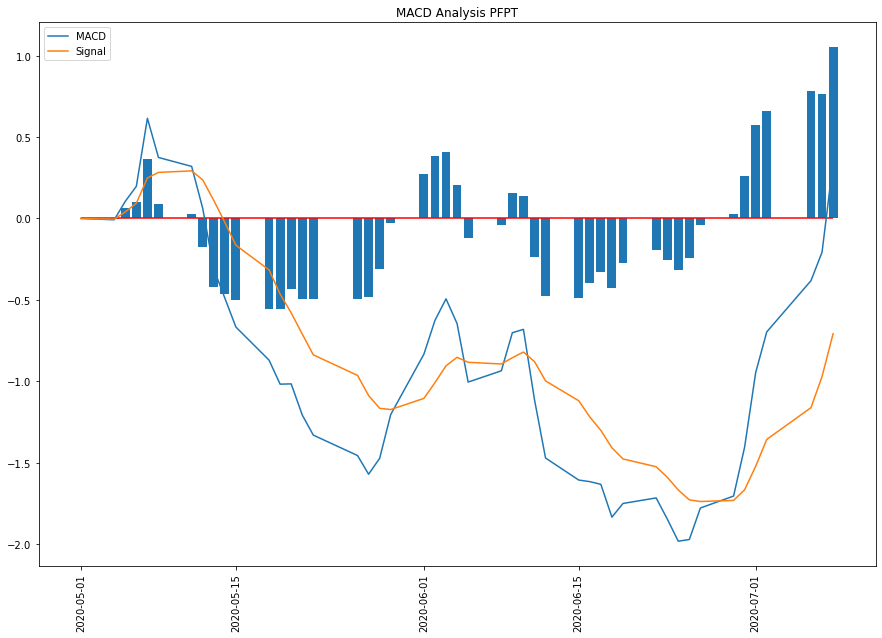

In [43]:
plt.figure(figsize=(15,10))
plt.title('MACD Analysis {}'.format(ticker))
plt.plot(SDOW['Date'],SDOW['MACD'],label='MACD')
plt.plot(SDOW['Date'],SDOW['signal'],label='Signal')
plt.hlines(0,SDOW['Date'].min(),SDOW['Date'].max(),'r')
plt.bar(SDOW['Date'],SDOW['hist'])
plt.legend()
plt.xticks(rotation=90)
plt.show()